## Project outline

I will compile a list of violent offences, based on a LIKE search, and calculate the percent difference in violent offence frequency by hour, weekday and month. This will be graphed in Altair, and output as an HTML file.
### What do I need?
Count of IDs as crime_total
WHERE OFFENSE_DESCRIPTION LIKE ("Assault" or "Robbery" or "Violent"), day of week, month, year




In [3]:
#Debugging: https://www.geeksforgeeks.org/postgresql-connect-to-postgresql-database-server-in-python/
import psycopg2
conn = psycopg2.connect(
    host="localhost",
    database="desmondmolloy",
    user="desmondmolloy",
    password="apassword")
cur = conn.cursor()
cur.execute("SELECT * FROM crime LIMIT 10")
rows = cur.fetchall()

In [4]:
if conn is not None:
    print('Connection established to PostgreSQL.')
else:
    print('Connection not established to PostgreSQL.')

Connection established to PostgreSQL.


In [5]:
import pandas as pd
from sqlalchemy import create_engine
alchemyEngine=create_engine('postgresql://desmondmolloy:@127.0.0.1', pool_recycle=3600);
dbConnection=alchemyEngine.connect();
df= pd.read_sql('SELECT COUNT(*) AS crime_total,\
               "MONTH","DAY_OF_WEEK", "HOUR" \
               FROM "crime" \
               WHERE "OFFENSE_DESCRIPTION" LIKE\'ASSAULT%\' \
               GROUP BY "MONTH","DAY_OF_WEEK", "HOUR"', dbConnection);
df.head()

,crime_total,MONTH,DAY_OF_WEEK,HOUR
0,141,1,Friday,0
1,72,1,Friday,1
2,66,1,Friday,2
3,27,1,Friday,3
4,37,1,Friday,4


In [1]:
!sql2csv --db postgresql:///desmondmolloy /Users/desmondmolloy/Desktop/SQL_queries/crime_test.sql  > export.csv

In [3]:
import altair as alt
import pandas as pd
df=pd.read_csv('export.csv')
base = alt.Chart(df).encode(
        alt.X('HOUR', title='Hour of the day',scale=alt.Scale(paddingInner=0),axis=alt.Axis(labels=False)),
        alt.Y('MONTH'),
        facet=alt.Facet('DAY_OF_WEEK', columns=3,sort=["Monday", "Tuesday", "Wednesday", "Thursday","Friday", "Saturday", "Sunday"]),
    )
heatmap = base.mark_rect().encode(
        color=alt.Color('crime_total:Q',
            scale=alt.Scale(scheme='viridis'),
                        bin=alt.Bin(maxbins=10))
        ).properties(width=90,height=90)
heatmap
df.head()

,crime_total,DAY_OF_WEEK,HOUR,MONTH
0,141,Friday,0,1
1,72,Friday,1,1
2,66,Friday,2,1
3,27,Friday,3,1
4,37,Friday,4,1


In [7]:
!sql2csv --db postgresql:///desmondmolloy /Users/desmondmolloy/Desktop/SQL_with_Python/crime_percent_difference.sql  > crime_percent_difference.csv

In [8]:
import pandas as pd
import altair as alt
df=pd.read_csv('crime_percent_difference.csv')
df.head()


,crime_count,MONTH,HOUR,DAY_OF_WEEK,percent_difference
0,1984,1,0,Friday,8.624670
1,1654,1,0,Monday,7.023793
2,1632,1,0,Saturday,6.917068
3,1708,1,0,Sunday,7.285755
4,1824,1,0,Thursday,7.848487


In [9]:
base = alt.Chart(df).encode(
        alt.X('HOUR:Q', title='Hour of the day',scale=alt.Scale(paddingInner=0),axis=alt.Axis(labels=False)),
        alt.Y('MONTH:N'),
        facet=alt.Facet('DAY_OF_WEEK:N', columns=3,sort=["Monday", "Tuesday", "Wednesday", "Thursday","Friday", "Saturday", "Sunday"]),
    )
heatmap = base.mark_rect().encode(
        color=alt.Color('percent_difference:Q',
            scale=alt.Scale(scheme='viridis'),
                        bin=alt.Bin(maxbins=10))
        ).properties(width=90,height=90)
heatmap

alt.Chart(...)

ImportError: The descartes package is required for plotting polygons in geopandas. You can install it using 'conda install -c conda-forge descartes' or 'pip install descartes'.

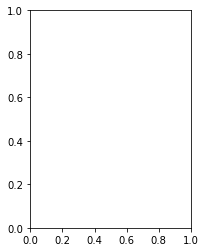

In [7]:
import geopandas as gpd
import pandas as pd
import folium
gdf = gpd.read_file("/Users/desmondmolloy/Downloads/Boston_Neighborhoods-shp/Boston_Neighborhoods.shp")
gdf.head()

In [ ]:
usa_state = folium.Map(location=[48, -102], zoom_start=3)
folium.Choropleth(
    geo_data = gdf,                  #json
    name ='choropleth',                  
    data = state_unemp,                     
    columns = ['State', 'Unemployment'], #columns to work on
    key_on ='feature.id',
    fill_color ='YlGnBu',     #I passed colors Yellow,Green,Blue
    fill_opacity = 0.7,
    line_opacity = 0.2
   legend_name = "Unemployment scale"
).add_to(usa_state)

